# Predicting Car Prices with K-Nearest Neighbors
The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. You can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile). Here's a preview of the data set:

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

In [3]:
cars.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [4]:
cars.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Price is our target column. Ten columns are numeric, the rest are object type. 

In [5]:
# Select only the columns with continuous values from - https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]

In [6]:
numeric_cars = numeric_cars.replace('?', np.nan)

In [7]:
numeric_cars = numeric_cars.astype('float')

Let's analyze and clean normalized-losses and other columns with NaN values

In [8]:
print(numeric_cars['normalized-losses'].isnull().sum()) #return the number of rows with nan values

41


In [9]:
numeric_cars['normalized-losses'].describe()

count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: normalized-losses, dtype: float64

In [10]:
numeric_cars['normalized-losses'] = numeric_cars['normalized-losses'].fillna(numeric_cars['normalized-losses'].mean())

In [11]:
print(numeric_cars.isnull().sum())

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 4
stroke               4
compression-rate     0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64


In [12]:
numeric_cars = numeric_cars.fillna(cars.mean())

In [13]:
# Since price is the target variable, we have to get rid of the missing values. Luckily, it is only 4 rows, so this should not affect our analysis much
numeric_cars = numeric_cars.dropna(subset=['price'])

In [14]:
print(numeric_cars.isnull().sum())

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 4
stroke               4
compression-rate     0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                0
dtype: int64


In [15]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [16]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [17]:
# Normalize all columnns to range from 0 to 1 except the target column.
price_col = numeric_cars['price']
numeric_cars = (numeric_cars.max() - numeric_cars)/(numeric_cars.max())
numeric_cars['price'] = price_col

## Univariate K-nearest Neighbors Model

In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
     # Fit a KNN model using default k value.
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_df[[train_col]])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    rmse_results[col] = rmse_val

# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

horsepower           4007.472352
curb-weight          4437.934395
highway-mpg          4579.037250
width                4644.898429
city-mpg             4729.673421
length               5382.671155
wheel-base           5527.682489
compression-rate     6736.676353
bore                 6816.853712
height               7487.652519
peak-rpm             7498.746475
normalized-losses    7635.170416
stroke               8078.491289
dtype: float64

Here, I created a function to train and test univariate models using different columns. The columns that performed best using default k value are horsepower, cur-weight and highway-mpg.

In [19]:
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[[train_col]])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
train_cols = numeric_cars.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    k_rmse_results[col] = rmse_val

k_rmse_results

{'bore': {1: 7496.149231240644,
  3: 6936.9888741632,
  5: 6816.8537123691885,
  7: 7062.061305053834,
  9: 6869.727437364902},
 'city-mpg': {1: 4540.361003224739,
  3: 4662.468376743848,
  5: 4729.673420999269,
  7: 5099.274289469859,
  9: 4999.291723774096},
 'compression-rate': {1: 9024.902677953633,
  3: 7033.552922995039,
  5: 6736.676353123451,
  7: 7459.113194422072,
  9: 7219.385481303907},
 'curb-weight': {1: 5518.883237405808,
  3: 5048.607726036669,
  5: 4437.934394635539,
  7: 4369.349089851214,
  9: 4632.205545221074},
 'height': {1: 9108.471836593655,
  3: 8049.98714728832,
  5: 7487.652518884965,
  7: 7753.797418084058,
  9: 7695.632426557866},
 'highway-mpg': {1: 5270.360471073066,
  3: 4618.186622340838,
  5: 4579.0372499290315,
  7: 4914.26000287261,
  9: 5181.912418963636},
 'horsepower': {1: 3749.5962185254293,
  3: 3964.9503610053594,
  5: 4007.4723516831596,
  7: 4391.481673529705,
  9: 4505.188632005311},
 'length': {1: 5291.785164547288,
  3: 5267.216777678541,


Here I modified the function to use k as iteration parameter. The resulting dictionary shows us the rmse for each column and k value. Let's visualize this for a better overview. 

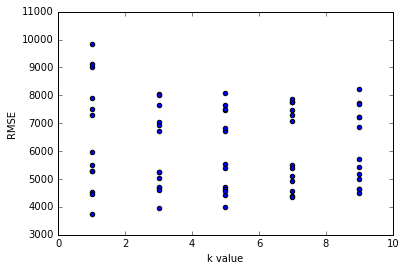

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.scatter(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

While none of the k values provides significantly better results from other, from the scatter plot we can see that 1 and 9 key values produced the biggest rmse in more features, than k values of 3 and 7.

## Multivariate K-Nearest Neighbors Model

In [21]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

two_best_features = ['horsepower', 'width']
rmse_val = knn_train_test(two_best_features, 'price', numeric_cars)
k_rmse_results["two best features"] = rmse_val

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test(three_best_features, 'price', numeric_cars)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val = knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg']
rmse_val = knn_train_test(five_best_features, 'price', numeric_cars)
k_rmse_results["five best features"] = rmse_val

six_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg', 'length']
rmse_val = knn_train_test(six_best_features, 'price', numeric_cars)
k_rmse_results["six best features"] = rmse_val

k_rmse_results

{'five best features': {5: 3346.6737097607775},
 'four best features': {5: 3232.103629232672},
 'six best features': {5: 3398.129011356364},
 'three best features': {5: 3212.559630605792},
 'two best features': {5: 3681.3980922556266}}

In [22]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test(three_best_features, 'price', numeric_cars)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val = knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg']
rmse_val = knn_train_test(five_best_features, 'price', numeric_cars)
k_rmse_results["five best features"] = rmse_val

k_rmse_results

{'five best features': {1: 2561.7319037195625,
  2: 2567.2749455482176,
  3: 2949.9007889192553,
  4: 3074.609110629889,
  5: 3346.6737097607775,
  6: 3686.4646211770864,
  7: 3907.195998257802,
  8: 4104.033987317772,
  9: 4335.71419742586,
  10: 4463.6007084810435,
  11: 4444.025988909045,
  12: 4534.547516044051,
  13: 4638.525701454197,
  14: 4686.768062739389,
  15: 4676.617231827435,
  16: 4706.48899163734,
  17: 4714.757468354599,
  18: 4724.017926210877,
  19: 4780.036456967258,
  20: 4790.865401485259,
  21: 4788.442914205118,
  22: 4820.25603556537,
  23: 4823.624611651547,
  24: 4830.771512289382},
 'four best features': {1: 3135.5489073677436,
  2: 2514.1812009849527,
  3: 2788.551941742018,
  4: 2917.4679936225316,
  5: 3232.103629232672,
  6: 3566.725419074407,
  7: 3834.980480987282,
  8: 3927.395248759061,
  9: 4078.9765839753827,
  10: 4199.8376270003955,
  11: 4345.006990461182,
  12: 4451.387011302762,
  13: 4550.163468300828,
  14: 4591.534016042883,
  15: 4630.3996

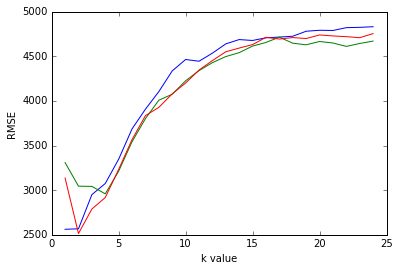

In [23]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

For the model with five features, the k value of 1 or 2 is optimal. For the model with four features, the optimal k value is 2. For the model with 2 features the optimal k value is 4.

## Cross Validation

In [24]:
from sklearn.model_selection import cross_val_score, KFold

num_folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23]

avg_rmses = []
avg_stds = []
for fold in num_folds:
    kf = KFold(fold, shuffle=True, random_state=1)
    model = KNeighborsRegressor()
    mses = cross_val_score(model, numeric_cars[four_best_features], numeric_cars["price"], scoring="neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    avg_rmse = np.mean(rmses)
    std_rmse = np.std(rmses)
    avg_rmses.append(avg_rmse)
    avg_stds.append(std_rmse)
    print(str(fold), "folds: ", "avg RMSE: ", str(avg_rmse), "std RMSE: ", str(std_rmse))

3 folds:  avg RMSE:  3007.8094892956906 std RMSE:  315.2179946679774
5 folds:  avg RMSE:  2796.661547427406 std RMSE:  303.0703211314228
7 folds:  avg RMSE:  2877.17395433554 std RMSE:  474.00317458028843
9 folds:  avg RMSE:  2789.7816169934335 std RMSE:  839.6310944221045
10 folds:  avg RMSE:  2702.9257037398665 std RMSE:  585.1561950742505
11 folds:  avg RMSE:  2723.2826837194684 std RMSE:  1054.660347724294
13 folds:  avg RMSE:  2788.471920243518 std RMSE:  901.1856523423929
15 folds:  avg RMSE:  2737.7984407671142 std RMSE:  1030.1600507271253
17 folds:  avg RMSE:  2691.12833243266 std RMSE:  1058.4123629202788
19 folds:  avg RMSE:  2672.046159968875 std RMSE:  1158.6560455936876
21 folds:  avg RMSE:  2627.342903622596 std RMSE:  1247.4020403017887
23 folds:  avg RMSE:  2584.1561561042695 std RMSE:  1294.1952042632413


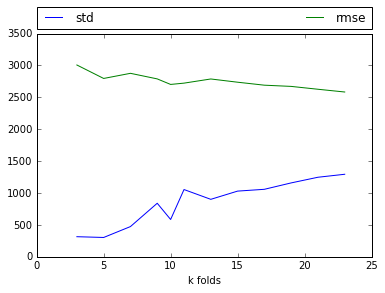

In [25]:
plt.plot(num_folds, avg_stds, label = 'std')
plt.plot(num_folds, avg_rmses, label = 'rmse')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.xlabel('k folds')
plt.title('Bias Variance Trade-Off')
plt.show()


## Bias Variance Trade-Off
For the model with four features, 10 folds cross validation provides the best bias variance trade-off.